##Import modules

In [30]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve
import pandas as pd

##Load raw data

In [ ]:
exp_data = open('EC-RP_IMS-RP_IC-RP_data_for_models.csv')
csv_exp = csv.reader(exp_data)

# IC-RP: initiator caspase reporter protein 
# IMS-RP: Mitochondrial inter-membrane space reporter protein
# EC-RP: Effector caspase reporter protein

time = []
IC_RP = []
IMS_RP = []
EC_RP = []

firstline = True
for row in csv_exp:
    if firstline:
        firstline = False
        continue
    time.append(float(row[0]))
    IC_RP.append(float(row[2]))
    IMS_RP.append(float(row[5]))
    EC_RP.append(float(row[8]))

time = np.array(time)
IC_RP = np.array(IC_RP)
IMS_RP = np.array(IMS_RP)
EC_RP = np.array(EC_RP)

##Exploratory plots of raw data

In [75]:
raw_data = pd.DataFrame.from_csv('EC-RP_IMS-RP_IC-RP_data_for_models.csv')
time = raw_data.index.values
IC_RP = raw_data['norm_IC-RP']
IMS_RP = raw_data['IMS-RP step']
EC_RP = raw_data['norm_EC-RP']

In [38]:
raw_data

,IC-RP,norm_IC-RP,nrm_var_IC-RP,IMS-RP,IMS-RP step,VAR,EC-RP,norm_EC-RP,nrm_var_EC-RP
Time,,,,,,,,,
180,0.7063,0.0000,0.0006,0,0,1,0.4451,0.0020,0.0003
360,0.7063,0.0000,0.0006,0,0,1,0.4460,0.0018,0.0003
540,0.7063,0.0000,0.0006,0,0,1,0.4459,0.0015,0.0003
720,0.7063,0.0000,0.0006,0,0,1,0.4458,0.0051,0.0003
900,0.7063,0.0000,0.0006,0,0,1,0.4474,0.0038,0.0002
1080,0.7063,0.0000,0.0006,0,0,1,0.4468,0.0042,0.0002
1260,0.7063,0.0000,0.0006,0,0,1,0.4470,0.0057,0.0003
1440,0.7063,0.0000,0.0006,0,0,1,0.4477,0.0022,0.0004
1620,0.7063,0.0000,0.0006,0,0,1,0.4461,0.0027,0.0004


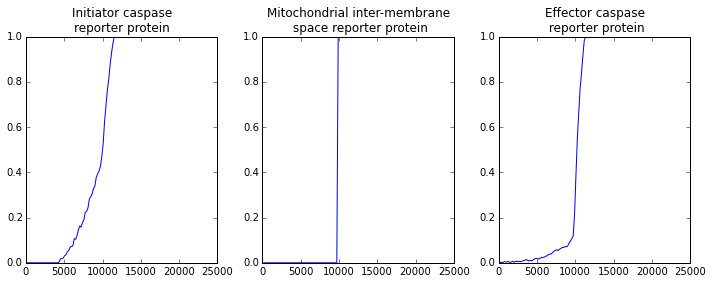

In [73]:
fig = plt.figure(figsize=(10,4))

ic_ax = fig.add_subplot(131)
ic_ax.plot(time,IC_RP)
ic_ax.set_title("Initiator caspase \nreporter protein")

ims_ax = fig.add_subplot(132)
ims_ax.plot(time,IMS_RP)
ims_ax.set_title("Mitochondrial inter-membrane\n space reporter protein")
ec_ax = fig.add_subplot(133)
ec_ax.plot(time,EC_RP)
ec_ax.set_title("Effector caspase\n reporter protein")
fig.tight_layout()

###Question 1
Why is the shape of the normalized columns different from the raw counts?  
Looking at the raw data, the values are "stuck" in 1 after some time

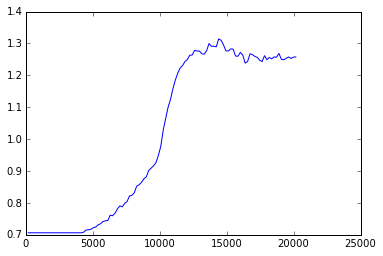

In [69]:
plt.plot(time,raw_data['IC-RP'])

##Define functions to fit

In [47]:
#We have to define the functions that we want to fit

def linea(x,a,b):
    return a*x+b


def expon(x,a,b,c):
    return a*np.exp(b*x)+c
    
    
def poli(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

##Fit data to functions

In [76]:
poptl, pcovl = curve_fit(linea,time,IC_RP)
poptp, pcovp = curve_fit(poli,time,IC_RP)
poptex, pcovex = curve_fit(expon,time,IC_RP, p0=(0.1, 1e-4,10))
 
linea_fit = linea(time,*poptl)
poli_fit = poli(time,*poptp)
expo_fit = expon(time,*poptex)

In [108]:
line_ax.scatter?

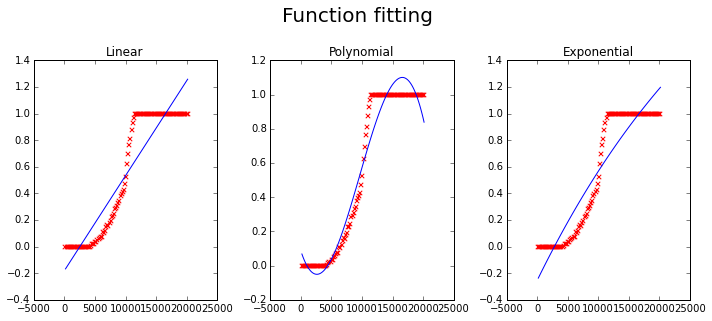

In [114]:
fig = plt.figure(figsize=(10,4))

line_ax = fig.add_subplot(131)
line_ax.plot(time,linea_fit)
line_ax.scatter(time,IC_RP,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(132)
poly_ax.plot(time,poli_fit)
poly_ax.scatter(time,IC_RP,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(133)
exp_ax.plot(time,expo_fit)
exp_ax.scatter(time,IC_RP,c='r',marker='x')
exp_ax.set_title("Exponential")

fig.suptitle("Function fitting\n\n",y=1.1,fontsize=20)

fig.tight_layout()

###Model definition with PySB

In [116]:
# some functions to make life easy
site_name = 'b'
def catalyze_b(enz, sub, product, klist):
    """Alias for pysb.macros.catalyze with default binding site 'b'.
    """
    return catalyze(enz, site_name, sub, site_name, product, klist)

def bind_table_b(table):
    """Alias for pysb.macros.bind_table with default binding sites 'bf'.
    """
    return bind_table(table, site_name, site_name)

# Default forward, reverse, and catalytic rates
KF = 1e-6
KR = 1e-3
KC = 1

# Bid activation rates
bid_rates = [        1e-7, 1e-3, 1] #

# Bcl2 Inhibition Rates
bcl2_rates = [1.428571e-05, 1e-3] # 1.0e-6/v_mito

# instantiate a model
Model()

# declare monomers
Monomer('C8', ['b'])
Monomer('Bid',    ['b', 'S'], {'S':['n', 't']})
Monomer('Bax',   ['b', 'S'], {'S':['d', 'a']})
Monomer('M',   ['b', 'S'], {'S':['c', 'p']})
Monomer('Smac', ['b', 'S'], {'S':['m', 'r']})
Monomer('Parp', ['b', 'S'],  {'S':['n', 'c']})


catalyze_b(C8, Bid(S='n'), Bid(S='t'), [KF, KR, KC])
# Activate Bax
catalyze_b(Bid(S='t'), Bax(S='d'), Bax(S='a'), [KF, KR, KC])

# Activate Bax/Bak
catalyze_b(Bax(S='a'), M(S='c'), M(S='p'), bid_rates)
catalyze_b(M(S='p'), Smac(S='m'), Smac(S='r'), bid_rates)
catalyze_b(Smac(S='r'), Parp(S='n'), Parp(S='c'), bid_rates)


# Bid, Bax, BclxL "transport" to the membrane
#equilibrate(Bid(b=None, S='t'),   Bid(b=None, S='m'), [1e-1, 1e-3])
#equilibrate(Bax(b=None, S='m'),   Bax(b=None, S='a'), [1e-1, 1e-3])
#equilibrate(BclxL(b=None, S='c'), BclxL(b=None, S='m'), [1e-1, 1e-3])


#bind_table_b([[                  Bcl2,  BclxL(S='m'),       Mcl1],
#              [Bid(S='m'), bcl2_rates,  bcl2_rates,   bcl2_rates],
#              [Bax(S='a'), bcl2_rates,  bcl2_rates,         None],
#              [Bak(S='a'),       None,  bcl2_rates,   bcl2_rates]])

# initial conditions
Parameter('C8_0',    1e4)
Parameter('Bid_0',   1e4)
Parameter('Bax_0',  .8e5)
Parameter('M_0',  .2e5)
Parameter('Smac_0', 1e3)
Parameter('Parp_0',  1e3)
# ==
Initial(C8(b=None), C8_0)
Initial(Bid(b=None, S='n'), Bid_0)
Initial(Bax(b=None, S='d'), Bax_0)
Initial(M(b=None, S='c'), M_0)
Initial(Smac(b=None, S='m'), Smac_0)
Initial(Parp(b=None, S='n'), Parp_0)

# Observables
Observable('obstBid', Bid(b=None, S='t'))
Observable('obsBax', Bax(b=None, S='a'))
Observable('obsSmac', Smac(b=None, S='r'))
Observable('obsParp', Parp(b=None, S='c'))


t = pl.linspace(0, 20000)
yout = odesolve(model, t)

/home/alekos/pythons/py2/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: ModelExistsWarning: Redefining model! (You can probably ignore this if you are running code interactively)


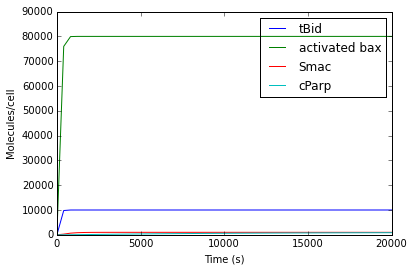

In [120]:
plt.plot(t, yout['obstBid'], label="tBid")
# obsC8 is not defined
# plt.plot(t, yout['obsC8'], label="C8")
plt.plot(t, yout['obsBax'], label='activated bax')
plt.plot(t, yout['obsSmac'], label='Smac')
plt.plot(t, yout['obsParp'], label='cParp')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Molecules/cell")
